Code for San Francisco
# Clean Energy Challenge

Purpose¶
The purpose of this notebook is to create a quick model to predict townships that do not already have solar that are likely to be successful for solar investment

Looking for input variables in the areas of:
- Income - number of households who have income out of population (used employment as proxy)
- Payment systems available (too broad)
- Grid or alternative energy
- Market size, population

Output
- Yes/no boolean willing to pay
- Amount willing to pay
- Predicted success of solar

Proxy potentials
- Number of households who are already paying for light via non electricity (battery, candle) 
- How much households are paying for substitute light products by product
- Number of households who are already paying for communication channels via non electricity
- Number of households who are already paying for cooking utilies via non electricity

Preferred granularity
- Township
- Annual

In [19]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys

In [20]:
#Read the CSV file 'Myanmar World Development Indicators"

path_census = '/Users/catherinezhang/Documents/Clean Energy Challenge/HouseholdPopulationbaseddatasetMIMUTownshipsabbreviated.csv'
df_census = pd.read_csv(path_census, header=0, index_col=0)

path_labor = '/Users/catherinezhang/Documents/Clean Energy Challenge/HouseholdPopulationbaseddatasetMIMUTownshipsLabour.csv'
df_labor = pd.read_csv(path_labor, header=0, index_col=0)

path_dictionary = '/Users/catherinezhang/Documents/Clean Energy Challenge/datadictionaryhhpoptownships.csv'
df_dictionary = pd.read_csv(path_dictionary, header=0, index_col=0)

path_indicators = '/Users/catherinezhang/Documents/Clean Energy Challenge/Myanmar world development indicators.csv'
df_indicators = pd.read_csv(path_indicators, header=0, index_col=0)

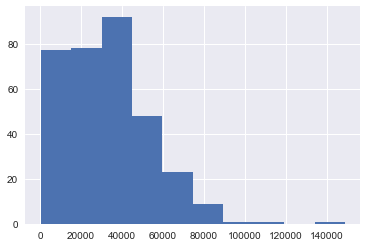

In [25]:
%matplotlib inline
df_census.light_t.hist()

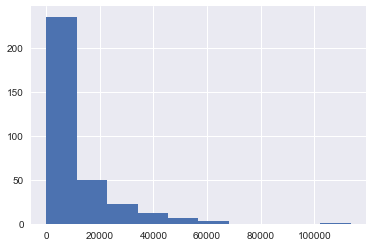

In [23]:
df_census.light_elec.hist()

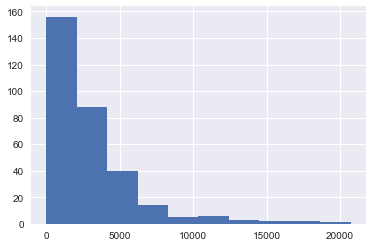

In [26]:
df_census.light_sol.hist()

In [38]:
df_light = df_census[[
'pcode_ts',
'pop_hh',
'pop_ins',
'light_t',
'light_elec',
'light_kero',
'light_cand',
'light_batt',
'light_gen',
'light_wat',
'light_sol',
'light_oth']]

In [106]:
df_light['light_substitute'] = df_light['light_kero'] + df_light['light_cand'] + df_light['light_batt'] + df_light['light_gen'] + df_light['light_wat'] + df_light['light_oth']
df_light['light_substitute_rate'] = df_light['light_substitute'] / df_light['pop_hh']
df_light['light_solar_rate'] = df_light['light_sol'] / df_light['pop_hh']
df_light['light_elec_rate'] = df_light['light_elec'] / df_light['pop_hh']


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

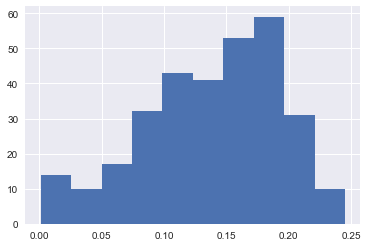

In [40]:
df_light.light_substitute_rate.hist()

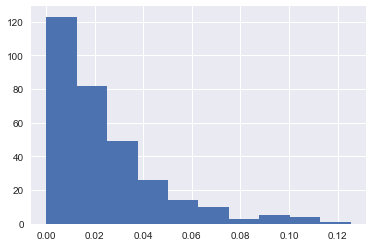

In [42]:
df_light.light_solar_rate.hist()

In [44]:
df_labor

,name_st,pcode_dt,name_dt,pcode_ts,name_ts,hh_t,hh_m,hh_f,pop_hh,pop_ins,...,idcard_10ab_t,idcard_10ab_citi_t,idcard_10ab_assc_t,idcard_10ab_natu_t,idcard_10ab_natreg_t,idcard_10ab_relig_t,idcard_10ab_temp_t,idcard_10ab_forreg_t,idcard_10ab_forpp_t,idcard_10ab_non_t
pcode_st,,,,,,,,,,,,,,,,,,,,,
MMR001,Kachin,MMR001D001,Myitkyina,MMR001001,Myitkyina,52591,36101,16490,283865,33739,...,257901,194513,1156.0,1692,1476,869,1964.0,358.0,111.0,55762
MMR001,Kachin,MMR001D001,Myitkyina,MMR001002,Waingmaw,22860,16034,6826,118747,6797,...,96930,65925,102.0,852,910,138,593.0,175.0,254.0,27981
MMR001,Kachin,MMR001D001,Myitkyina,MMR001003,Injangyang,285,232,53,1420,312,...,1322,997,0.0,0,1,0,2.0,0.0,0.0,322
MMR001,Kachin,MMR001D001,Myitkyina,MMR001004,Tanai,8528,7050,1478,48781,11238,...,46706,33100,16.0,99,693,78,236.0,3.0,14.0,12467
MMR001,Kachin,MMR001D001,Myitkyina,MMR001005,Chipwi,3306,2672,634,19170,869,...,14551,8118,4.0,10,96,9,113.0,92.0,39.0,6070
MMR001,Kachin,MMR001D001,Myitkyina,MMR001006,Tsawlaw,1073,895,178,6499,19,...,4584,3097,0.0,3,18,3,5.0,0.0,0.0,1458
MMR001,Kachin,MMR001D002,Mohnyin,MMR001007,Mohnyin,39622,27431,12191,195143,14149,...,168390,126455,230.0,470,1570,1270,842.0,22.0,31.0,37500
MMR001,Kachin,MMR001D002,Mohnyin,MMR001008,Mogaung,24898,17611,7287,126795,5813,...,105015,76010,235.0,286,698,450,410.0,30.0,21.0,26875
MMR001,Kachin,MMR001D002,Mohnyin,MMR001009,Hpakant,36632,31072,5560,169498,162210,...,283658,224307,261.0,1055,3037,679,4594.0,21.0,45.0,49659


# Linear regression model

### Inputs:
- Light_elec_rate as a proxy for already on grid
- pop_hh for population
- Employment

### Potential additional inputs:
- Female/male headed households
- Household size
- Housing Type
- Transportation
- Education
- Urban/Rural
- Source of drinking water
- Type of ownership

In [45]:
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression

In [59]:
df_model = df_light[[
'pop_hh',
'light_elec_rate',
'light_solar_rate']]

In [60]:
df_model_indx = df_model.reset_index()
df_model_indx = df_model_indx[['pop_hh', 'light_elec_rate','light_solar_rate']]

In [61]:
df_model_indx

,pop_hh,light_elec_rate,light_solar_rate
0,283865,0.094330,0.021281
1,118747,0.022973,0.046367
2,1420,0.033099,0.045070
3,48781,0.028638,0.033107
4,19170,0.058268,0.000417
5,6499,0.023388,0.001693
6,195143,0.060863,0.042687
7,126795,0.085311,0.026507
8,169498,0.031540,0.032844
9,118313,0.083820,0.035355


In [94]:
X = df_model_indx.drop('light_solar_rate', axis = 1)
y = df_model_indx[['light_solar_rate']]
y = y.round(decimals=5)
y = y.fillna(value=0)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
lm.coef_

array([[ -5.03631895e-08,  -1.35702580e-01]])

In [103]:
lm.intercept_

array([ 0.03989235])

In [104]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [105]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       light_solar_rate   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     37.19
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           2.80e-15
Time:                        23:27:22   Log-Likelihood:                 810.61
No. Observations:                 330   AIC:                            -1615.
Df Residuals:                     327   BIC:                            -1604.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.0399      0.002     

### Element	Description
- R-squared	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points
- Adj. R-squared	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals
- F-statistic	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals
- Prob (F-statistic)	The probability that you would get the above statistic, given the null hypothesis that they are unrelated
- Log-likelihood	The log of the likelihood function.
- AIC	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
- BIC	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.
- The second table reports for each of the coefficients
- coef	The estimated value of the coefficient
- std err	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.
- t	The t-statistic value. This is a measure of how statistically significant the coefficient is.
- P > |t|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
- [95.0% Conf. Interval]	The lower and upper values of the 95% confidence interval

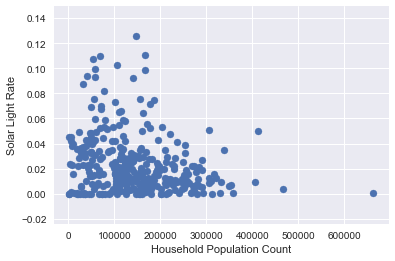

In [90]:
plt.scatter(df_model_indx[['pop_hh']], Y)
plt.xlabel('Household Population Count')
plt.ylabel('Solar Light Rate')

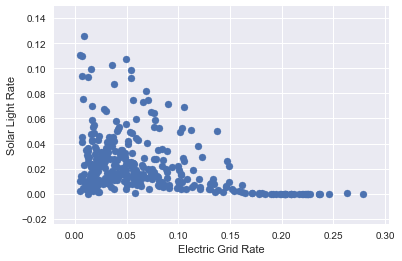

In [108]:
plt.scatter(df_model_indx[['light_elec_rate']], Y)
plt.xlabel('Electric Grid Rate')
plt.ylabel('Solar Light Rate')

## Add more variables
usuact_10ab_t
usuact_10ab_govemp_t
usuact_10ab_priemp_t
usuact_10ab_empyr_t
usuact_10ab_ownacc_t
usuact_10ab_unpfam_t
usuact_10ab_seekw_t
usuact_10ab_nseekw_t
usuact_10ab_stu_t
usuact_10ab_hhwork_t
usuact_10ab_retir_t
usuact_10ab_ill_t

In [115]:
df_census['light_substitute'] = df_census['light_kero'] + df_census['light_cand'] + df_census['light_batt'] + df_census['light_gen'] + df_census['light_wat'] + df_census['light_oth']
df_census['light_substitute_rate'] = df_census['light_substitute'] / df_census['pop_hh']
df_census['light_solar_rate'] = df_census['light_sol'] / df_census['pop_hh']
df_census['light_elec_rate'] = df_census['light_elec'] / df_census['pop_hh']
df_census['sum_pop_hh'] = 47929999
df_census['pop_hh_rate'] = df_census['pop_hh'] / df_census['sum_pop_hh']
df_census['hh_m_rate'] = df_census['hh_m'] / df_census['pop_hh']
df_census['hh_f_rate'] = df_census['hh_f'] / df_census['pop_hh']
df_census['pop_u_rate'] = df_census['pop_u'] / df_census['pop_hh']
df_census['pop_r_rate'] = df_census['pop_r'] / df_census['pop_hh']
df_census['govemp_rate'] = df_census['usuact_10ab_govemp_t'] / df_census ['usuact_10ab_t']
df_census['priemp_rate'] = df_census['usuact_10ab_priemp_t'] / df_census['usuact_10ab_t']
df_census['empyr_rate'] = df_census['usuact_10ab_empyr_t'] / df_census['usuact_10ab_t']
df_census['ownacc_rate'] = df_census['usuact_10ab_ownacc_t'] / df_census['usuact_10ab_t']
df_census['unpfam_rate'] = df_census['usuact_10ab_unpfam_t'] / df_census['usuact_10ab_t']
df_census['seekw_rate'] = df_census['usuact_10ab_seekw_t'] / df_census['usuact_10ab_t']
df_census['stu_rate'] = df_census['usuact_10ab_stu_t'] / df_census['usuact_10ab_t']
df_census['hhwork_rate'] = df_census['usuact_10ab_hhwork_t'] / df_census['usuact_10ab_t']
df_census['retir_rate'] = df_census['usuact_10ab_retir_t'] / df_census['usuact_10ab_t']
df_census['ill_rate'] = df_census['usuact_10ab_ill_t'] / df_census['usuact_10ab_t']

In [120]:
df_model_more = df_census[[
'pcode_ts',
'pop_hh_rate',
'hh_m_rate',
'hh_f_rate',
'pop_r_rate',
'pop_u_rate',
'govemp_rate',
'priemp_rate',
'empyr_rate',
'ownacc_rate',
'unpfam_rate',
'seekw_rate',
'stu_rate',
'hhwork_rate',
'retir_rate',
'ill_rate',
'light_elec_rate',
'light_solar_rate',
'light_substitute_rate']]

In [122]:
df_model_more
df_model_more = df_model_more.set_index(['pcode_ts'])

In [123]:
df_model_more

,pop_hh_rate,hh_m_rate,hh_f_rate,pop_r_rate,pop_u_rate,govemp_rate,priemp_rate,empyr_rate,ownacc_rate,unpfam_rate,seekw_rate,stu_rate,hhwork_rate,retir_rate,ill_rate,light_elec_rate,light_solar_rate,light_substitute_rate
pcode_ts,,,,,,,,,,,,,,,,,,
MMR001001,0.005922,0.127177,0.058091,0.250464,0.868392,0.053009,0.141729,0.016022,0.203225,0.037704,0.028135,0.223051,0.191558,0.052505,0.007658,0.094330,0.021281,0.069656
MMR001002,0.002478,0.135027,0.057484,0.832762,0.224477,0.022222,0.094450,0.012184,0.268668,0.108336,0.027257,0.209326,0.170907,0.046621,0.007830,0.022973,0.046367,0.123169
MMR001003,0.000030,0.163380,0.037324,0.906338,0.313380,0.060514,0.164145,0.024962,0.230711,0.243570,0.001513,0.198185,0.037821,0.022693,0.003026,0.033099,0.045070,0.122535
MMR001004,0.001018,0.144523,0.030299,0.463377,0.766999,0.030467,0.109750,0.018884,0.350597,0.102150,0.014602,0.173704,0.151094,0.028348,0.004261,0.028638,0.033107,0.113077
MMR001005,0.000400,0.139384,0.033073,0.899791,0.145540,0.065769,0.041509,0.009690,0.260188,0.154560,0.049412,0.181637,0.150780,0.032300,0.008659,0.058268,0.000417,0.113772
MMR001006,0.000136,0.137713,0.027389,0.946299,0.056624,0.026178,0.022251,0.003272,0.339442,0.226876,0.014398,0.212696,0.095550,0.022469,0.006981,0.023388,0.001693,0.140022
MMR001007,0.004071,0.140569,0.062472,0.782247,0.290259,0.036748,0.118083,0.021492,0.234628,0.091924,0.023000,0.193497,0.184993,0.058483,0.005523,0.060863,0.042687,0.099491
MMR001008,0.002645,0.138893,0.057471,0.848582,0.197263,0.040442,0.099481,0.019759,0.239213,0.081636,0.024492,0.198667,0.209827,0.056087,0.006028,0.085311,0.026507,0.084546
MMR001009,0.003536,0.183318,0.032803,1.568461,0.388541,0.009367,0.318620,0.027794,0.279699,0.043373,0.014542,0.108663,0.145534,0.018286,0.002246,0.031540,0.032844,0.151736


In [130]:
Xm = df_model_more.drop('light_solar_rate', axis = 1)
ym = df_model_more[['light_solar_rate']]
Xm = Xm.round(decimals=5)
Xm = Xm.fillna(value=0)
ym = ym.round(decimals=5)
ym = ym.fillna(value=0)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
lm.fit(Xm, ym)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
Xm2 = sm.add_constant(Xm)
estm = sm.OLS(ym, Xm2)
est2m = estm.fit()
print(est2m.summary())

                            OLS Regression Results                            
Dep. Variable:       light_solar_rate   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          9.55e-157
Time:                        08:53:26   Log-Likelihood:                 1186.3
No. Observations:                 330   AIC:                            -2337.
Df Residuals:                     312   BIC:                            -2268.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                     0.01